In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
# Load the data from a CSV file
data = pd.read_csv('Salary_dataset.csv')

In [13]:
# Extract features and target
X = data[['Experience']]  # 2D array
y = data[['Salary']]      # 2D array for scaling

In [14]:
# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [15]:
# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [16]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict scaled salary for test set
y_pred_scaled = model.predict(X_test)

In [18]:
# Inverse transform predictions and actual values for meaningful comparison
y_test_actual = scaler_y.inverse_transform(y_test)
y_pred_actual = scaler_y.inverse_transform(y_pred_scaled)
X_test_actual = scaler_X.inverse_transform(X_test)
X_train_actual = scaler_X.inverse_transform(X_train)
y_train_actual = scaler_y.inverse_transform(y_train)

In [19]:
# Print regression equation (based on scaled data)
print(f"Regression Equation (scaled): Salary = {model.coef_[0][0]:.2f} * Experience + {model.intercept_[0]:.2f}")

Regression Equation (scaled): Salary = 0.98 * Experience + -0.02


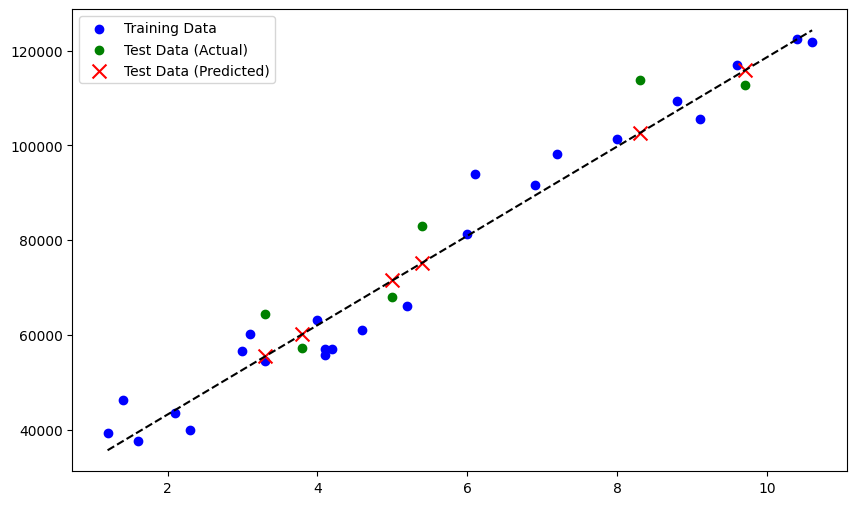

In [24]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(X_train_actual, y_train_actual, color='blue', label='Training Data')
plt.scatter(X_test_actual, y_test_actual, color='green', label='Test Data (Actual)')
plt.scatter(X_test_actual, y_pred_actual, color='red', marker='x', s=100, label='Test Data (Predicted)')
plt.legend()

# Plot regression line
x_range_scaled = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)
y_line_scaled = model.predict(x_range_scaled)
x_range_actual = scaler_X.inverse_transform(x_range_scaled)
y_line_actual = scaler_y.inverse_transform(y_line_scaled)
plt.plot(x_range_actual, y_line_actual, color='black', linestyle='--', label='Regression Line')
plt.show()